In [108]:
# program for analyzing some of my facebook conversations
import numpy as np
import pandas as pd
import os
import json
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

path = 'D:\\Python\\fb convo analysis'
os.chdir(path)

In [61]:
# function that gets json from directory
def get_message(query):
    message_path = os.path.join(path, 'facebook-shawnliu90\messages\inbox')
    # Searching through message_path for query
    message_folder = os.listdir(message_path)
    # Combining message path with the file name
    message_file = os.path.join(message_path, 
                list(filter(lambda x: query in x, message_folder))[0], 
                'message_1.json')
    with open(message_file, 'r') as json_file:  
        file = json.load(json_file)
    return file

In [62]:
# function that formats the message into one big string for word cloud
def format_message(text):
    message_string = ''
    for content in text['messages']:
        if 'content' in content.keys():
            # Appends all text into one big string
            message_string = message_string + ' ' + content['content']
    # Removing leading and trailing spaces
    message_string = message_string.rstrip().lstrip()
    return message_string

In [63]:
# removing junk words by adding to stopwords
junk_words = {'lol', 'yeah', 'okay', 'thank', 'thanks', 'you', 'man'
              'go', 'think', 'oh', 'ok','that', 'thats', 'yo', 'ya','bro'}

for word in junk_words:
    STOPWORDS.add(word)

# wordcloud function
def create_wordcloud(text):
    # mask image for the shape of the cloud
    mask = np.array(Image.open(os.path.join(path, 'mask.png')))
    # filtering out stopwords like the, and, is, etc.
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
                  mask=mask,
                  max_words=200,
                  stopwords=stopwords)
    # generating the wordcloud
    wc.generate(text)
    return wc

In [64]:
# function that converts the date in text for purposes of plotting 
def date_conversion(text):
    # converting timestamps into dates, first by dividing out the milliseconds in the timestamps
    text['timestamp_ms'] = text['timestamp_ms']//1000
    # iterating and appending onto a list, then replacing the timestamp column with the date list
    date_list = []
    for timestamp in text['timestamp_ms']:
        timestamp = datetime.fromtimestamp(timestamp)
        date_list.append(timestamp)
    text['timestamp_ms'] = date_list
    return text

In [65]:
# TBD more complicated stuff
def context_analysis(text):
    ''' 
    using spacy and other nlp libraries to do some more advanced analysis 
    - context
    - named entities
    - similar conversations between different people
    '''

In [66]:
# executing function that gets the message file 
main_text = get_message('AlysaaCoco')

In [67]:
# formatting and creating wordcloud
main_text_wordcloud = format_message(main_text).lower()
cloud = create_wordcloud(main_text_wordcloud)

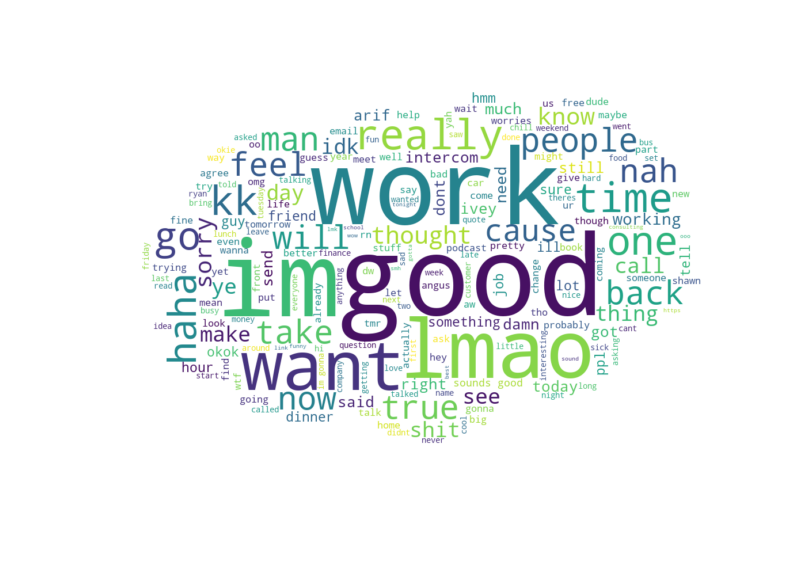

In [70]:
# showing the wordcloud in a plot
plt.figure(figsize=(20,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [71]:
# parsing the json into a dataframe for analysis
main_text_df = pd.DataFrame.from_dict(main_text['messages'])

# grabbing the timestamp, sender, content, and type
main_text_df = main_text_df[['sender_name', 'timestamp_ms', 'content', 'type']]

# converting timestamp to datetime
main_text_df_ts = date_conversion(main_text_df)
main_text_df_ts.head()

,sender_name,timestamp_ms,content,type
0,Alysaa Coco,2019-07-11 16:57:08,NaN,Generic
1,Alysaa Coco,2019-07-11 16:57:02,Also found your next home at Stanford:,Generic
2,Alysaa Coco,2019-07-11 11:03:41,"And yes! On the plane rn, landing in like 2 ho...",Generic
3,Alysaa Coco,2019-07-11 11:03:26,We should start it ð,Generic
4,Alysaa Coco,2019-07-11 11:03:22,Nah I donât think so,Generic


In [73]:
# how many total messages did we send to each other?
total_msgs = len(main_text_df_ts)
print(total_msgs)

5215


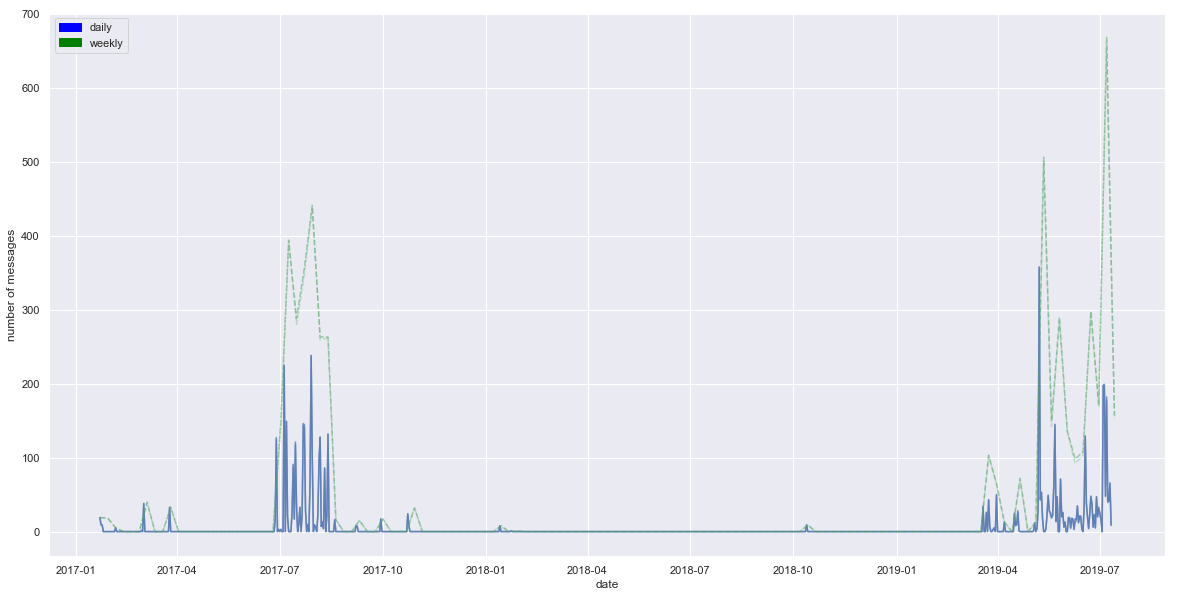

In [109]:
# plotting daily messages -- Need to clean up the graph
messages_day = main_text_df_ts.groupby(pd.Grouper(key='timestamp_ms', freq='D')).count()
messages_week = main_text_df_ts.groupby(pd.Grouper(key='timestamp_ms', freq='W')).count()

sns.set()
plt.figure(figsize=(20,10))
plt.plot(messages_day, color = 'b', alpha = 0.5)
plt.plot(messages_week, color = 'g', alpha = 0.3, linestyle = '--')
plt.xlabel('date')
plt.ylabel('number of messages')
legend_daily = mpatches.Patch(color = 'blue', label = 'daily')
legend_weekly = mpatches.Patch(color = 'green', label = 'weekly')
plt.legend(handles=[legend_daily, legend_weekly])

plt.show()

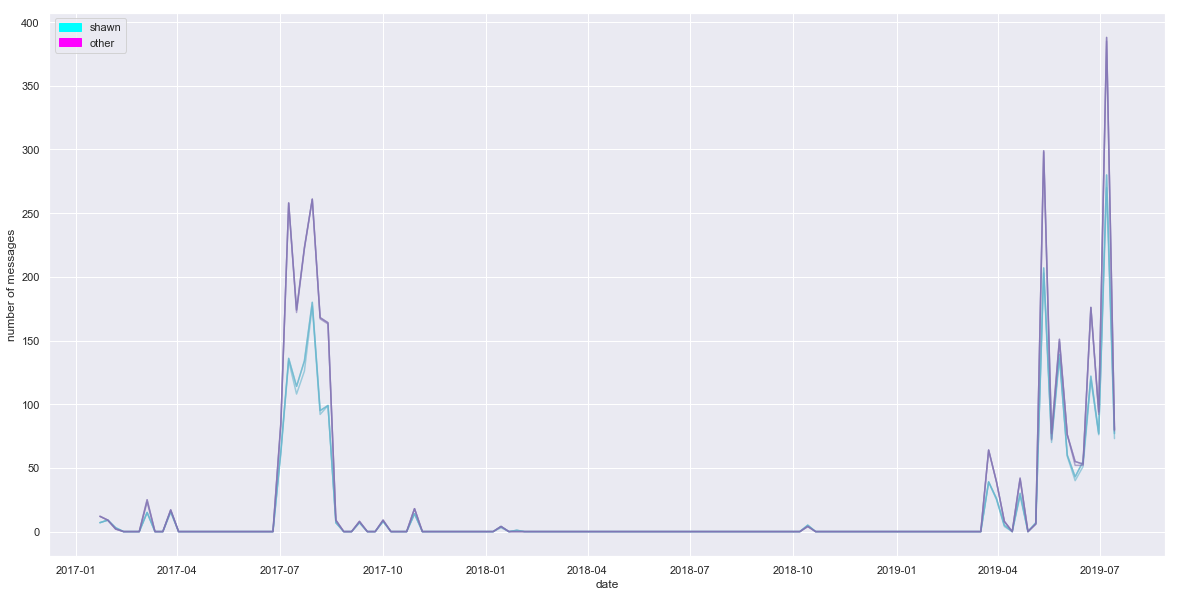

In [110]:
# splitting up weekly messages by sender name
messages_day_shawn = main_text_df_ts[main_text_df_ts['sender_name'] == 'Shawn Liu'].groupby(pd.Grouper(key='timestamp_ms', 
                                                                                                   freq='W')).count()
messages_day_other = main_text_df_ts[main_text_df_ts['sender_name'] != 'Shawn Liu'].groupby(pd.Grouper(key='timestamp_ms', 
                                                                                                   freq='W')).count()

plt.figure(figsize=(20,10))
plt.plot(messages_day_shawn, color = 'c', alpha = 0.6)
plt.plot(messages_day_other, color = 'm', alpha = 0.6)
plt.xlabel('date')
plt.ylabel('number of messages')
legend_shawn = mpatches.Patch(color = 'cyan', label = 'shawn')
legend_other = mpatches.Patch(color = 'magenta', label = 'other')
plt.legend(handles=[legend_shawn, legend_other])

plt.show()

In [ ]:
# weekday and hourly plots

In [ ]:
# sentiment analysis